In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from Wind.Results import DBResults, DBMeasures
from Wind.Util.Maps import create_mapbox_plot
from Wind.Private.DBConfig import mapbox_token
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
from Wind.Private.DBConfig import mongolocaltest, mongolocal, mongolocalmeasures
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from statsmodels.genmod.generalized_linear_model import GLM
import pandas as pd
import numpy as np

In [4]:
def create_lat_lon(sites):
   list_sites = sites['site'].tolist()
   latlon_df = pd.read_csv('e:/Wind$JM/analysis_final_results_experiments/20190823Summary_file.csv')
   df = latlon_df.loc[latlon_df['site_number'].isin(list_sites)]
   return df

#
class MongoData:
    def __init__(self, server, db, user, passwd, collect):
        self.server = server
        self.db = db
        self.user = user
        self.passwd = passwd
        self.col = collect

mongolocalmeasures = MongoData('mongodb://localhost:27017/', 'WindMeasures', '', '',
                            'WindMeasures')

In [43]:
query={'experiment':'MLP_s2s_2', 'status':'done'}

results = DBResults(conn=mongolocal)
results.retrieve_results(query)


In [5]:
results.sample(1.0)
a=results.extract_result()

In [6]:
measure = DBMeasures(conn=mongolocalmeasures)

measure.retrieve_measures()


In [7]:
meas = 'SpecEnt'
var='wind_direction_sin'
b1=measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure=meas)
b2=measure.extract_measure_sites(sites= a[:,0], var='wind_direction_sin', measure=meas)
b3=measure.extract_measure_sites(sites= a[:,0], var='wind_direction_cos', measure=meas)
b4=measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure='Stab3m')
data = pd.DataFrame({'test':a[:,1], f'{meas}_wind_speed':b1[:,1],f'{meas}_wind_direction_sin':b2[:,1], 
                     f'{meas}_wind_direction_cos':b3[:,1],f'Stab3m_wind_speed':b4[:,1]})
model = GLM.from_formula(f'test ~ {meas}_wind_speed + {meas}_wind_direction_sin + {meas}_wind_direction_cos + Stab3m_wind_speed', data)
result = model.fit()
print(result.summary())
print(result.deviance/(len(data)-1)*np.var(a[:,1]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:               126613
Model:                            GLM   Df Residuals:                   126608
Model Family:                Gaussian   Df Model:                            4
Link Function:               identity   Scale:                         0.14669
Method:                          IRLS   Log-Likelihood:                -58142.
Date:                Sun, 05 Jan 2020   Deviance:                       18572.
Time:                        00:16:41   Pearson chi2:                 1.86e+04
No. Iterations:                     3   Covariance Type:             nonrobust
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     25.9255      0.037    694.582      0.000      25.852      25.999
Spec

In [8]:
meas = 'SpecEnt'
meas2 = 'Stab3m'
b1=measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure=meas)
b2=measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure=meas2)
data = pd.DataFrame({'test':a[:,1], f'{meas}_wind_speed':b1[:,1],f'{meas2}_wind_speed':b2[:,1]})
model = GLM.from_formula(f'test ~ {meas}_wind_speed + {meas2}_wind_speed', data)
result = model.fit()
print(result.summary())
print(result.deviance/(len(data)-1)*np.var(a[:,1]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:               126661
Model:                            GLM   Df Residuals:                   126658
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                         0.15405
Method:                          IRLS   Log-Likelihood:                -61263.
Date:                Sun, 05 Jan 2020   Deviance:                       19511.
Time:                        00:16:42   Pearson chi2:                 1.95e+04
No. Iterations:                     3   Covariance Type:             nonrobust
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             25.6214      0.037    696.397      0.000      25.549      25.694
SpecEnt_wind_speed    -1.709

In [9]:
meas = 'SpecEnt'
var='wind_speed'
b=measure.extract_measure_sites(sites= a[:,0], var=var, measure=meas)
data = pd.DataFrame({'test':a[:,1], meas:b[:,1]})

In [10]:
model = GLM.from_formula(f'test ~ {meas}', data)
result = model.fit()
print(result.summary())
print(result.deviance/(len(data)-1)*np.var(a[:,1]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:               126661
Model:                            GLM   Df Residuals:                   126659
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.17100
Method:                          IRLS   Log-Likelihood:                -67875.
Date:                Sun, 05 Jan 2020   Deviance:                       21659.
Time:                        00:16:43   Pearson chi2:                 2.17e+04
No. Iterations:                     3   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.8420      0.030    766.805      0.000      22.784      22.900
SpecEnt       -1.4875      0.003   -539.898      0.0

### statistical measures Mean - Var - Elevation

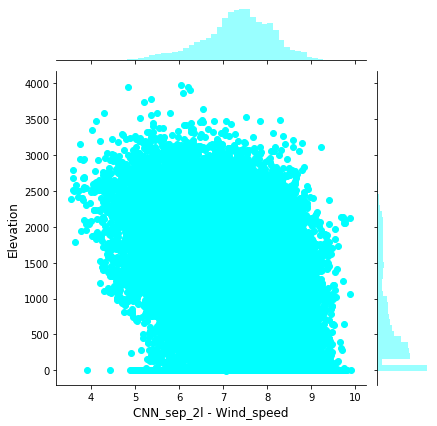

In [11]:
df = pd.read_csv('e:/Wind$JM/analysis_final_results_experiments/site-state/20191225SummaryFile(0.6)-arreglado.csv')
snsplot = sns.jointplot(x='JM_CNN_sep_2l_FULL-test',y='elevation', data=df, color = "cyan")
snsplot.set_axis_labels('CNN_sep_2l - Wind_speed', 'Elevation', fontsize=12)
snsplot.savefig('e:/figures/elevation_scatterplot.png')

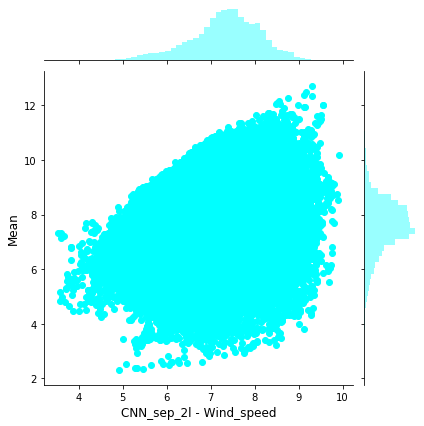

In [12]:
df = pd.read_csv('e:/Wind$JM/analysis_final_results_experiments/site-state/20191225SummaryFile(0.6)-arreglado.csv')
snsplot = sns.jointplot(x='JM_CNN_sep_2l_FULL-test',y='mean', data=df, color = "cyan")
snsplot.set_axis_labels('CNN_sep_2l - Wind_speed', 'Mean', fontsize=12)
snsplot.savefig('e:/figures/mean_scatterplot.png')

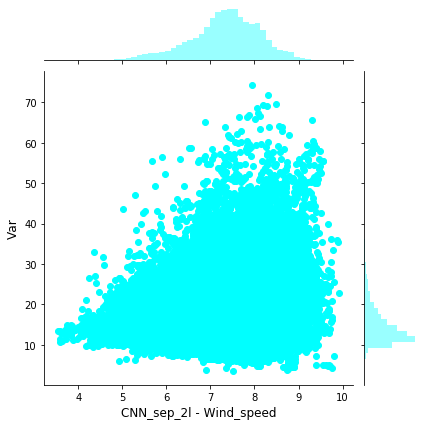

In [13]:
df = pd.read_csv('e:/Wind$JM/analysis_final_results_experiments/site-state/20191225SummaryFile(0.6)-arreglado.csv')
snsplot = sns.jointplot(x='JM_CNN_sep_2l_FULL-test',y='var', data=df, color = "cyan")
snsplot.set_axis_labels('CNN_sep_2l - Wind_speed', 'Var', fontsize=12)
snsplot.savefig('e:/figures/var_scatterplot.png')

### Spectral Analysis Measures

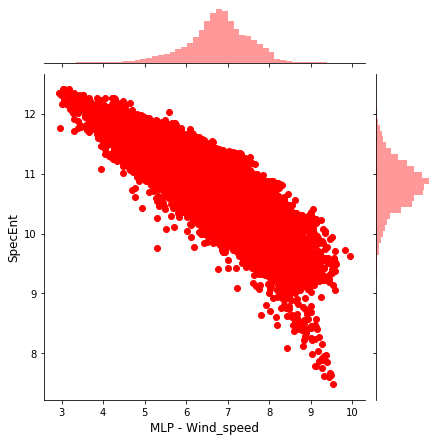

In [11]:
graph = sns.jointplot(a[:,1], b[:,1],color="r")

# JointGrid has a convenience function
graph.set_axis_labels('MLP - Wind_speed', 'SpecEnt', fontsize=12)
graph.savefig('SpecEnt_red.pdf')
graph.savefig('SpecEnt_red.png')

    # Where is the tail? 

In [13]:
import plotly.express as px
# we try to analyze where are the sites in the tail of the figure

In [14]:
import plotly.express as px

fig = px.scatter_mapbox(r1_df, lat="Lat", lon="Lon", hover_name="Site", hover_data=["Val"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=800)

fig.update_layout(mapbox_style="open-street-map")
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#fig.show()

In [15]:
#fig = plt.figure()
#sns.jointplot(a[:,1], b[:,1])
#fig = plt.figure()
#sns.regplot('test',meas, data=data, truncate=True, line_kws={'color':'red', 'linewidth':2,'linestyle':'--'})

In [16]:
measure.variables

['wind_speed',
 'temperature',
 'density',
 'pressure',
 'wind_direction_cos',
 'wind_direction_sin']

In [17]:
measure.measures

['SpecEnt',
 'SampEnt',
 'Stab12h',
 'Lump12h',
 'Stab24h',
 'Lump24h',
 'Stab1w',
 'Lump1w',
 'Stab1m',
 'Lump1m',
 'Stab3m',
 'Lump3m',
 'Stab6m',
 'Lump6m']

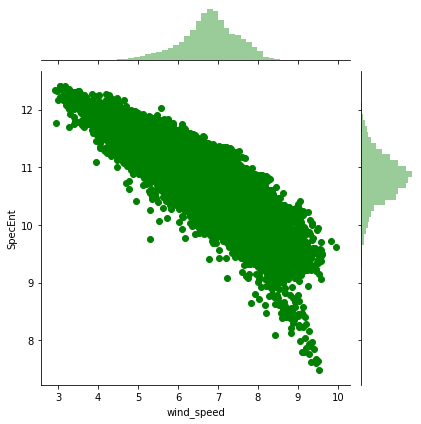

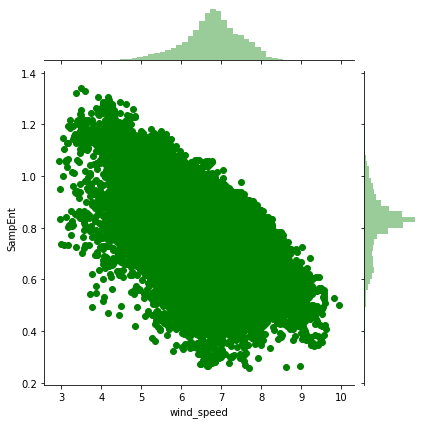

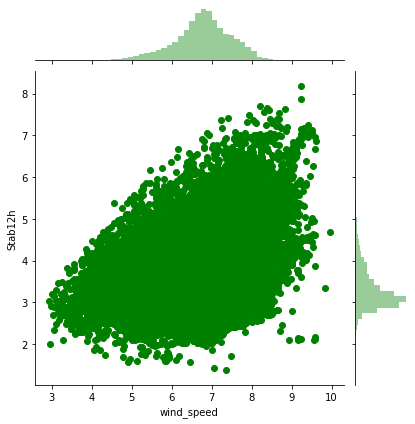

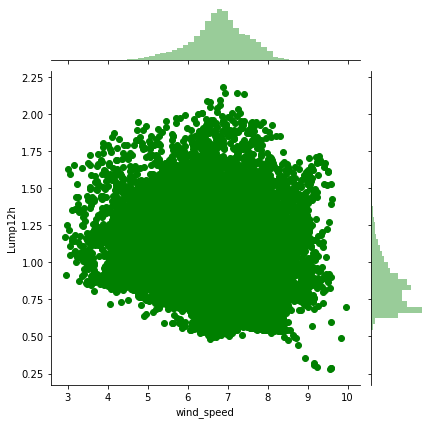

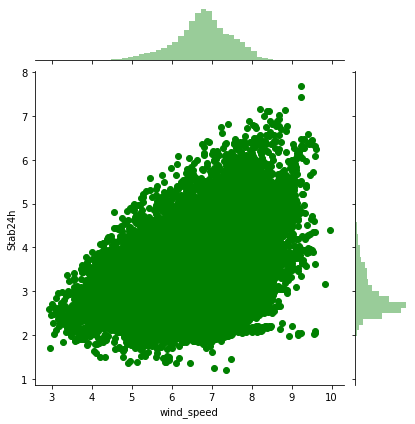

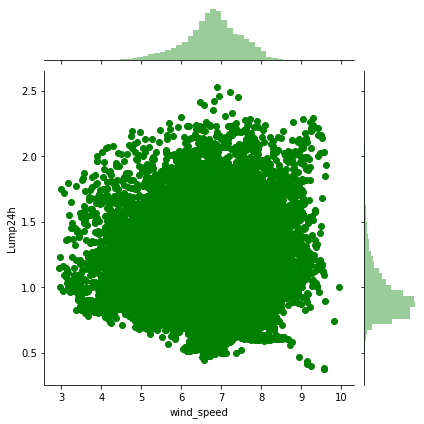

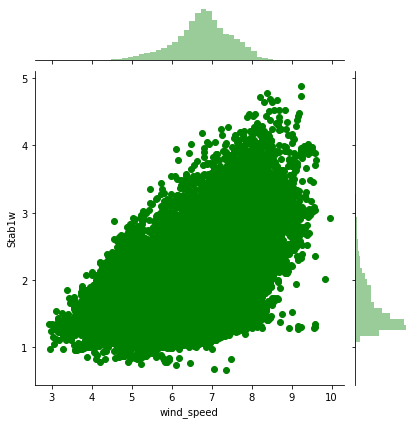

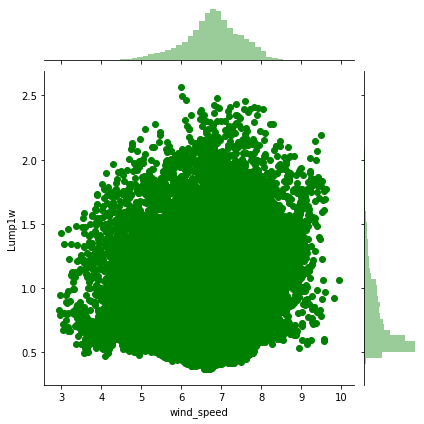

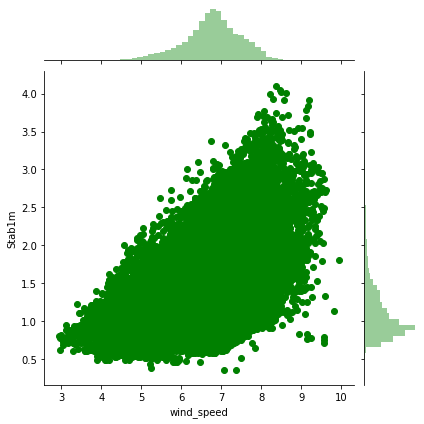

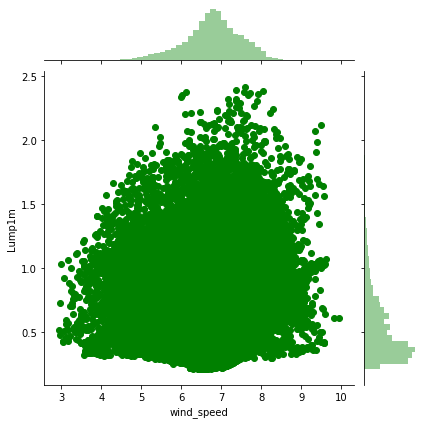

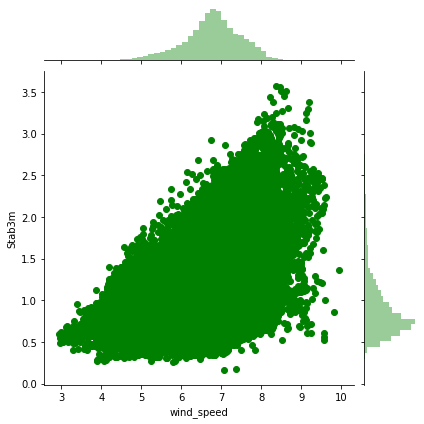

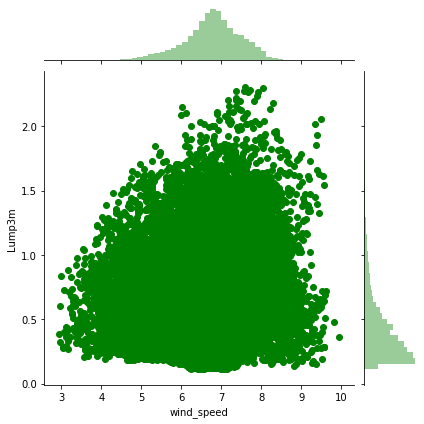

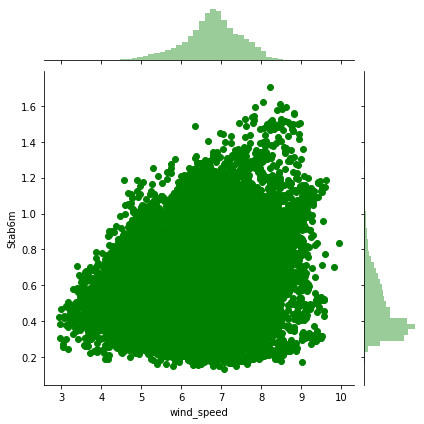

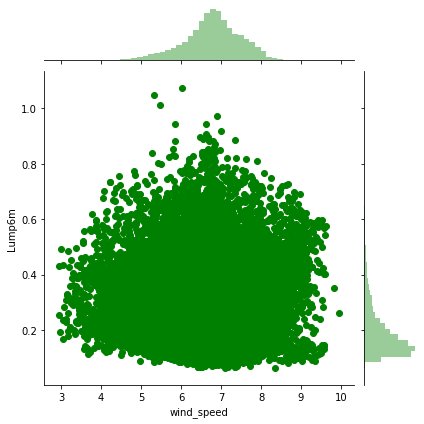

In [18]:
for m in measure.measures:
    b = measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure=m)
    data = pd.DataFrame({'wind_speed':a[:,1], m:b[:,1]})
    snsplot = sns.jointplot(x='wind_speed', y=m, data=data, color = "g")
    snsplot.savefig(m+'fig.pdf')
    snsplot.savefig(m+'fig.png')

correlation SpecEnt+SampEnt+Lump6m+Lump12h: -0.8561882064827407


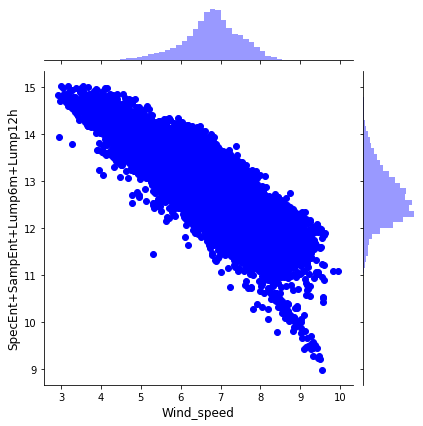

In [19]:
cols = ['SampEnt', 'Stab12h', 'Lump12h', 'Stab24h', 'Lump24h', 'Stab1w', 'Lump1w', 'Stab1m', 'Lump1m',
'Stab3m', 'Lump3m', 'Stab6m', 'Lump6m']
cols = ['SampEnt', 'Lump6m','Lump12h']
c = measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure='SpecEnt')

for m in cols:
    b = measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure=m)
    c[:,1] = c[:,1] + b[:,1]
    
data = pd.DataFrame({'wind_speed':a[:,1], 'best_measures':c[:,1]})
snsplot = sns.jointplot(x='wind_speed', y='best_measures', data=data, color = "blue")
snsplot.set_axis_labels('Wind_speed','SpecEnt+SampEnt+Lump6m+Lump12h', fontsize=12)

snsplot.savefig('best_correlation.pdf')
snsplot.savefig('best_correlation.png')
#correlations

df = pd.DataFrame({'wind_speed':a[:,1], m:c[:,1]})
col1 = 'wind_speed'
col2 = m
correlation = df[col1].corr(df[col2])
print('correlation SpecEnt+SampEnt+Lump6m+Lump12h:', correlation)

    We add all of them

correlation all together: 0.3359060228933894


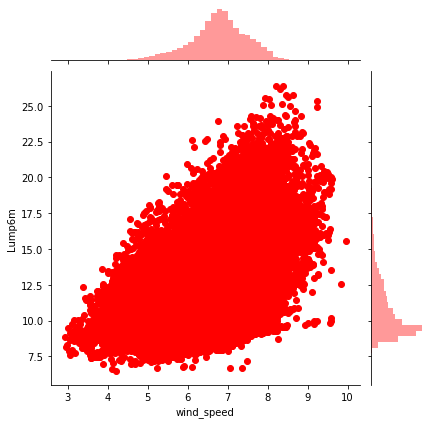

In [20]:
cols_pos = ['Stab24h', 'Stab1w', 'Lump1w', 'Stab1m', 'Lump1m',
'Stab3m', 'Lump3m', 'Stab6m']
cols_neg = ['SampEnt', 'Stab12h', 'Lump24h','Lump24h', 'Lump6m']

c = measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure='Stab12h')
# positive
for m in cols_pos:
    b=measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure=m)
    c[:,1] = c[:,1] + b[:,1]
# negative
for m in cols_neg:
    b=measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure=m)
    c[:,1] = c[:,1] + (1-b[:,1])
    
data = pd.DataFrame({'wind_speed':a[:,1], m:c[:,1]})
sns.jointplot(x='wind_speed', y=m, data=data, color = "red")
#snsplot.set_axis_labels('Wind_speed','All Spectral', fontsize=12)

snsplot.savefig(m+'fig.pdf')
#correlations

df = pd.DataFrame({'wind_speed':a[:,1], m:c[:,1]})
col1 = 'wind_speed'
col2 = m
correlation = df[col2].corr(df[col1])
print('correlation','all together:', correlation)

    # correlations

In [21]:
from scipy.stats import pearsonr, kendalltau,spearmanr

for m in measure.measures:
   b=measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure=m)
   df = pd.DataFrame({'wind_speed':a[:,1], m:b[:,1]})
   #sns.jointplot(x='wind_speed', y=m, data=data)
   col1 = 'wind_speed'
   col2 = m
   correlation = df[col2].corr(df[col1])
   print('correlation', m, ':', correlation)

correlation SpecEnt : -0.834922473510016
correlation SampEnt : -0.640719319061849
correlation Stab12h : 0.2465729314611581
correlation Lump12h : -0.2821800822112412
correlation Stab24h : 0.2824091701361976
correlation Lump24h : -0.05792013899473918
correlation Stab1w : 0.32374821717857255
correlation Lump1w : 0.10981272577757213
correlation Stab1m : 0.35158862891635856
correlation Lump1m : 0.0754219501887398
correlation Stab3m : 0.34622961253797824
correlation Lump3m : 0.038760247252553455
correlation Stab6m : 0.11718833347980168
correlation Lump6m : -0.08594743146487681


    # sumamos dos measures

In [22]:
r = 'SpecEnt'

b = measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure= r)
for m in measure.measures:
   c = measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure=m)
   b[:,1] = b[:,1] + c[:,1]
            
   df = pd.DataFrame({'wind_speed':a[:,1], m:b[:,1]})
   #sns.jointplot(x='wind_speed', y=m, data=data)
   col1 = 'wind_speed'
   col2 = m
   correlation = df[col2].corr(df[col1])
   print('correlation', m, '+ SpecEnt:', correlation)

correlation SpecEnt + SpecEnt: -0.834922473510016
correlation SampEnt + SpecEnt: -0.8549321263772685
correlation Stab12h + SpecEnt: -0.694654923944229
correlation Lump12h + SpecEnt: -0.6585673150103664
correlation Stab24h + SpecEnt: -0.37574993669570084
correlation Lump24h + SpecEnt: -0.34215907767388304
correlation Stab1w + SpecEnt: -0.20637255409032765
correlation Lump1w + SpecEnt: -0.16952348522641952
correlation Stab1m + SpecEnt: -0.08823585142918298
correlation Lump1m + SpecEnt: -0.07209986449146125
correlation Stab3m + SpecEnt: -0.019821779631397484
correlation Lump3m + SpecEnt: -0.014960328952293439
correlation Stab6m + SpecEnt: -0.008250660743596051
correlation Lump6m + SpecEnt: -0.0105934091916871


    # Ahora sumamos tres SpecEnt + SampEnt + all

In [23]:
cols = ['Stab12h', 'Lump24h','Lump24h', 'Lump6m']
r = 'SpecEnt'
c = measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure= r)
r = 'SampEnt'
d = measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure= r)

d = d + c

for m in measure.measures:
   b = measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure=m)
   b[:,1] = b[:,1] + d[:,1]
            
   df = pd.DataFrame({'wind_speed':a[:,1], m:b[:,1]})
   #sns.jointplot(x='wind_speed', y=m, data=data)
   col1 = 'wind_speed'
   col2 = m
   correlation = df[col2].corr(df[col1])
   print('correlation', m, '+ SpecEnt + SampEnt:', correlation)

correlation SpecEnt + SpecEnt + SampEnt: -0.8549321263772685
correlation SampEnt + SpecEnt + SampEnt: -0.864049807142239
correlation Stab12h + SpecEnt + SampEnt: -0.44464158442541113
correlation Lump12h + SpecEnt + SampEnt: -0.8775727780457142
correlation Stab24h + SpecEnt + SampEnt: -0.43147585513331504
correlation Lump24h + SpecEnt + SampEnt: -0.8513896981869209
correlation Stab1w + SpecEnt + SampEnt: -0.5961074258685224
correlation Lump1w + SpecEnt + SampEnt: -0.8120178138232672
correlation Stab1m + SpecEnt + SampEnt: -0.6621543052806285
correlation Lump1m + SpecEnt + SampEnt: -0.8233212881926518
correlation Stab3m + SpecEnt + SampEnt: -0.7043263213384524
correlation Lump3m + SpecEnt + SampEnt: -0.8321498897207612
correlation Stab6m + SpecEnt + SampEnt: -0.8577816655328959
correlation Lump6m + SpecEnt + SampEnt: -0.8853400267696063


    # We add SpecEnt + SampEnt + Lump6m + Lump12m

In [24]:
measure_best = ['SpecEnt', 'SampEnt', 'Lump6m','Lump12h']
measure_best = ['SampEnt', 'Lump6m','Lump12h']
b = measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure='SpecEnt')
for m in measure_best:
   print(m)
   c = measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure=m)
   b[:,1] = b[:,1] + c[:,1]
            
df = pd.DataFrame({'wind_speed':a[:,1], m:c[:,1]})
#sns.jointplot(x='wind_speed', y=m, data=data)
col1 = 'wind_speed'
col2 = m
correlation = df[col2].corr(df[col1])
print('correlation+ SpecEnt + SampEnt + Lump6m:', correlation)

SampEnt
Lump6m
Lump12h
correlation+ SpecEnt + SampEnt + Lump6m: -0.2821800822112412


       # veamos las correlaciones con la persistencia

In [25]:
query={'experiment':'Persistence', 'status':'done'}

results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.sample(0.5)
a=results.extract_result()
print (len(a))

E:\wind\Wind\Results\DBResults.py:111: UserWarning:

No pollo file found, maps will not be available



63346


In [26]:
for m in measure.measures:
   b=measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure=m)
   df = pd.DataFrame({'wind_speed':a[:,1], m:b[:,1]})
   #sns.jointplot(x='wind_speed', y=m, data=data)
   col1 = 'wind_speed'
   col2 = m
   correlation = df[col2].corr(df[col1])
   print('correlation', m, ':', correlation)

correlation SpecEnt : -0.6103805668830677
correlation SampEnt : -0.6624321126924705
correlation Stab12h : 0.4269395508738034
correlation Lump12h : -0.02059657336984869
correlation Stab24h : 0.5045584381232672
correlation Lump24h : 0.14491593546360163
correlation Stab1w : 0.5578592637124478
correlation Lump1w : 0.4468142079257295
correlation Stab1m : 0.5549646887155781
correlation Lump1m : 0.42686459476191724
correlation Stab3m : 0.5209825394980034
correlation Lump3m : 0.3773849810298084
correlation Stab6m : 0.22905486550961493
correlation Lump6m : 0.17771594324015946


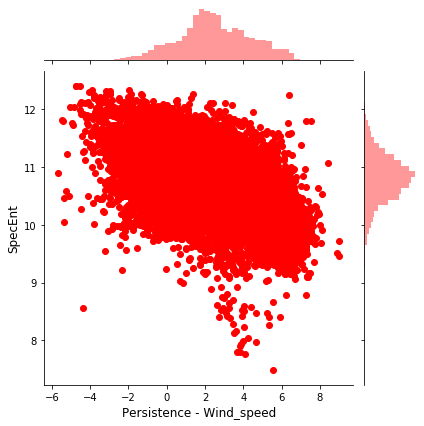

In [27]:
b=measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure='SpecEnt')
data = pd.DataFrame({'wind_speed':a[:,1], m:b[:,1]})

snsplot = sns.jointplot(x='wind_speed', y=m, data=data, color = "red")
snsplot.set_axis_labels('Persistence - Wind_speed','SpecEnt', fontsize=12)

snsplot.savefig('Persistence.pdf')
snsplot.savefig('Persistence.png')

In [28]:
for m in measure.measures:
   b=measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure=m)
   df = pd.DataFrame({'wind_speed':a[:,1], m:b[:,1]})
   #sns.jointplot(x='wind_speed', y=m, data=data)
   col1 = 'wind_speed'
   col2 = m
   correlation = df[col2].corr(df[col1])
   print('correlation', m, ':', correlation)

correlation SpecEnt : -0.6103805668830677
correlation SampEnt : -0.6624321126924705
correlation Stab12h : 0.4269395508738034
correlation Lump12h : -0.02059657336984869
correlation Stab24h : 0.5045584381232672
correlation Lump24h : 0.14491593546360163
correlation Stab1w : 0.5578592637124478
correlation Lump1w : 0.4468142079257295
correlation Stab1m : 0.5549646887155781
correlation Lump1m : 0.42686459476191724
correlation Stab3m : 0.5209825394980034
correlation Lump3m : 0.3773849810298084
correlation Stab6m : 0.22905486550961493
correlation Lump6m : 0.17771594324015946


    # Random Forest

In [29]:
query={'experiment':'JM_RF_s2s_2', 'status':'done'}

results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.sample(0.5)
a=results.extract_result()
print (len(a))

E:\wind\Wind\Results\DBResults.py:111: UserWarning:

No pollo file found, maps will not be available



63346


In [30]:
for m in measure.measures:
   b=measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure=m)
   df = pd.DataFrame({'wind_speed':a[:,1], m:b[:,1]})
   #sns.jointplot(x='wind_speed', y=m, data=data)
   col1 = 'wind_speed'
   col2 = m
   correlation = df[col2].corr(df[col1])
   print('correlation', m, ':', correlation)

correlation SpecEnt : -0.8452458783115109
correlation SampEnt : -0.662394391385953
correlation Stab12h : 0.2820318728876323
correlation Lump12h : -0.23588876024010144
correlation Stab24h : 0.31963538932438784
correlation Lump24h : -0.015851299776306144
correlation Stab1w : 0.3646610306689036
correlation Lump1w : 0.15833929869332902
correlation Stab1m : 0.3840923834518578
correlation Lump1m : 0.12325841428266861
correlation Stab3m : 0.37468649648361585
correlation Lump3m : 0.08475560418563925
correlation Stab6m : 0.14559188989865815
correlation Lump6m : -0.03435885427881315


In [31]:
m

'Lump6m'

     # Random Forest

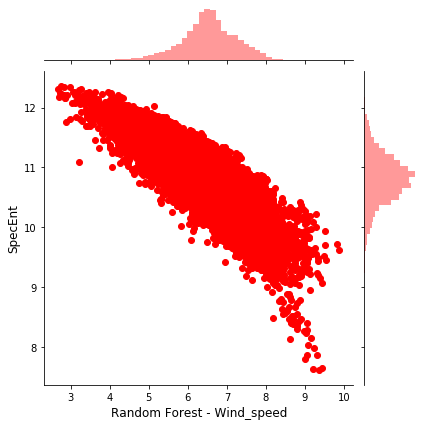

In [33]:
b=measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure='SpecEnt')
data = pd.DataFrame({'wind_speed':a[:,1], 'SpecEnt':b[:,1]})

snsplot = sns.jointplot(x='wind_speed', y='SpecEnt', data=data, color = "red")
snsplot.set_axis_labels('Random Forest - Wind_speed','SpecEnt', fontsize=12)

snsplot.savefig('RF_SpecEnt.pdf')
snsplot.savefig('RF_SpecEnt.png')

### Seasonality measures
    (1) Seasonality Index

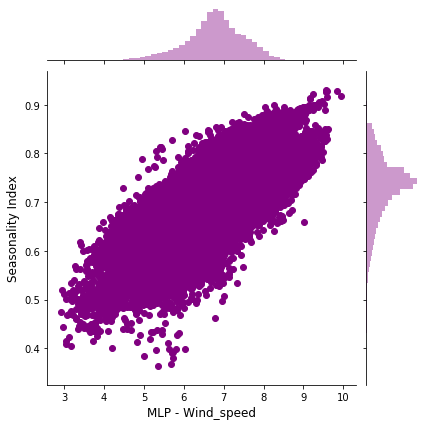

In [5]:
df = pd.read_csv('e:/Wind$JM/analysis_final_results_experiments/20190823Summary_file.csv')
snsplot = sns.jointplot(x='MLP_s2s_2-val', y='seas_index', data=df, color = "purple")
snsplot.set_axis_labels('MLP - Wind_speed','Seasonality Index', fontsize=12)

col1 = 'MLP_s2s_2-test'
col2 = 'seas_index'

In [35]:
correlation = df[col2].corr(df[col1])
print(correlation)

0.8358665522117164


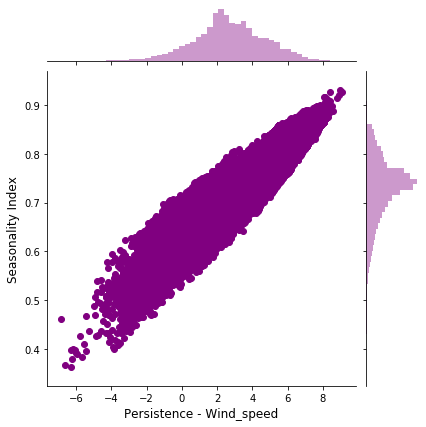

In [36]:
snsplot = sns.jointplot(x='Persistence-test', y='seas_index', data=df, color = "purple")
snsplot.set_axis_labels('Persistence - Wind_speed','Seasonality Index', fontsize=12)

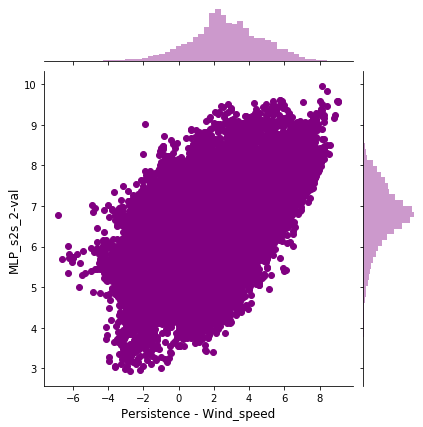

In [37]:
snsplot = sns.jointplot(x='Persistence-test', y='MLP_s2s_2-val', data=df, color = "purple")
snsplot.set_axis_labels('Persistence - Wind_speed','MLP_s2s_2-val', fontsize=12)

In [38]:
col1 = 'Persistence-test'
col2 = 'MLP_s2s_2-val'
correlation = df[col2].corr(df[col1])
print(correlation)

0.6950936170328084


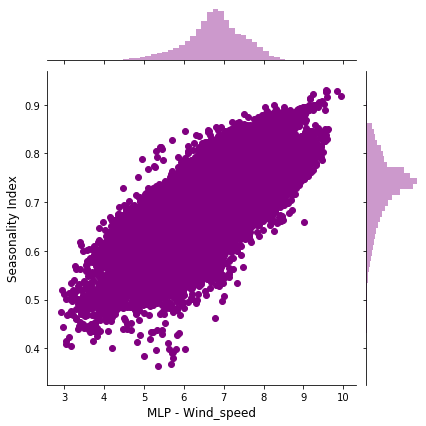

In [65]:
df = pd.read_csv('e:/Wind$JM/analysis_final_results_experiments/site-state/20191225SummaryFile(0.6)-arreglado.csv')
snsplot = sns.jointplot(x='MLP_s2s_2-val', y='seas_index', data=df, color = "purple")
snsplot.set_axis_labels('MLP - Wind_speed','Seasonality Index', fontsize=12)


In [64]:
df.columns
col1 = 'seas_index'
col2 = 'MLP_s2s_2-test'
correlation = df[col2].corr(df[col1])
print(correlation)

Index(['site_number', 'site', 'seas_index', 'mean', 'var', 'Lon-old',
       'Lat-old', 'Persistence-test', 'Persistence-val', 'MLP_s2s_2-test',
       'MLP_s2s_2-val', 'Lat_trunc', 'Lon_trunc', 'state', 'Lat', 'Lon',
       'JM_CNN_sep_2l_FULL-test', 'JM_CNN_sep_2l_FULL-val', 'MLP_s2s_elu-test',
       'MLP_s2s_elu-val', 'CNN_s2s_elu-test', 'CNN_s2s_elu-val',
       'JM_RF_s2s_2-test', 'JM_RF_s2s_2-val', 'elevation', 'complexity',
       'seasonal', 'residual', 'trend', 'complexity_riley',
       'strength_seasonality', 'strenght_trend'],
      dtype='object')

0.8358664950770345


### Statistically complex mesaures - decomposition...

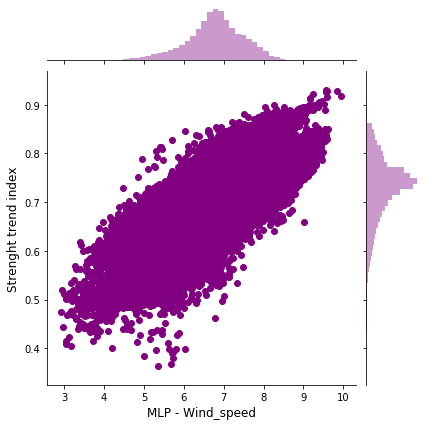

In [8]:
df = pd.read_csv('e:/Wind$JM/analysis_final_results_experiments/site-state/20191225SummaryFile(0.6)-arreglado.csv')
col1 = 'MLP_s2s_2-test'
col2 = 'strength_trend'
snsplot = sns.jointplot(x='MLP_s2s_2-val', y='strength_trend', data=df, color = "purple")
snsplot.set_axis_labels('MLP - Wind_speed','Strenght trend index', fontsize=12)


correlation 0.7893472752012374


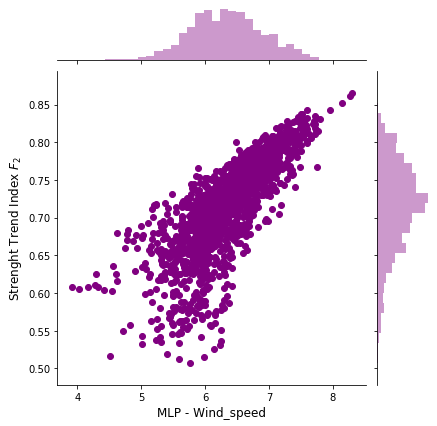

In [11]:
pdX = df[(df['state']=='UT') ]
snsplot = sns.jointplot(x='MLP_s2s_2-val', y='strength_trend', data=pdX, color = "purple")
snsplot.set_axis_labels('MLP - Wind_speed','Strenght Trend Index $F_2$', fontsize=12)
correlation = pdX['MLP_s2s_2-val'].corr(pdX['strength_trend'])
print('correlation',correlation)

(nan, 1.0)

correlation 0.9076031273808424


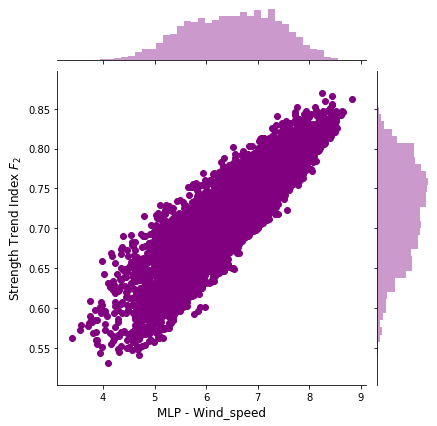

In [32]:
pdX = df[(df['state']=='WY')]
from scipy.stats import pearsonr
pearsonr(df['MLP_s2s_2-val'],df['strength_trend'])

snsplot = sns.jointplot(x='MLP_s2s_2-val', y='strength_trend', data=pdX, color = "purple",annot_kws={'stat':'pearsonr'})
snsplot.set_axis_labels('MLP - Wind_speed','Strength Trend Index $F_2$', fontsize=12)

# donde poner los titulos de esto?????

correlation = pdX['MLP_s2s_2-val'].corr(pdX['strength_trend'])
print('correlation',correlation)


In [15]:
col1 = 'MLP_s2s_2-test'
col2 = 'strenght_trend'
correlation = df[col2].corr(df[col1])
print(correlation)

0.8358664642958777


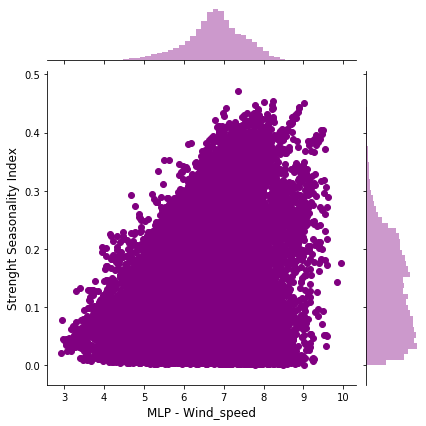

In [16]:
snsplot = sns.jointplot(x='MLP_s2s_2-val', y='strength_seasonality', data=df, color = "purple")
snsplot.set_axis_labels('MLP - Wind_speed','Strenght Seasonality Index', fontsize=12)


In [76]:
col1 = 'MLP_s2s_2-test'
col2 = 'strength_seasonality'
correlation = df[col2].corr(df[col1])
print(correlation)

0.0955717670671073


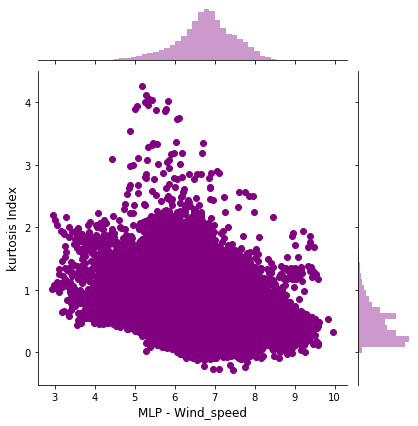

In [17]:
df = pd.read_csv('e:/Wind$JM/analysis_final_results_experiments/site-state/20191225SummaryFile(0.6)-arreglado.csv')
snsplot = sns.jointplot(x='MLP_s2s_2-val', y='kurtosis', data=df, color = "purple")
snsplot.set_axis_labels('MLP - Wind_speed','kurtosis Index', fontsize=12)

In [18]:
col1 = 'MLP_s2s_2-test'
col2 = 'kurtosis'
correlation = df[col2].corr(df[col1])
print(correlation)

-0.057752776354027674


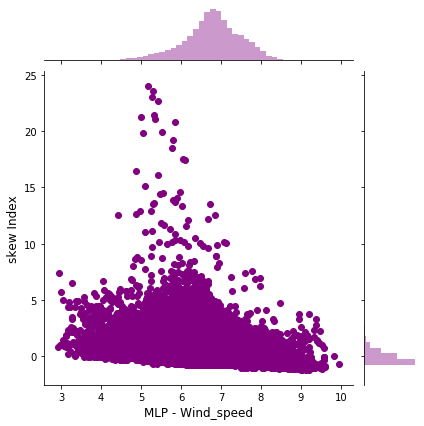

In [19]:
df = pd.read_csv('e:/Wind$JM/analysis_final_results_experiments/site-state/20191225SummaryFile(0.6)-arreglado.csv')
snsplot = sns.jointplot(x='MLP_s2s_2-val', y='skew', data=df, color = "purple")
snsplot.set_axis_labels('MLP - Wind_speed','skew Index', fontsize=12)

In [20]:
col1 = 'MLP_s2s_2-test'
col2 = 'skew'
correlation = df[col2].corr(df[col1])
print(correlation)

-0.062175548263622205


### Terrain complexity measures

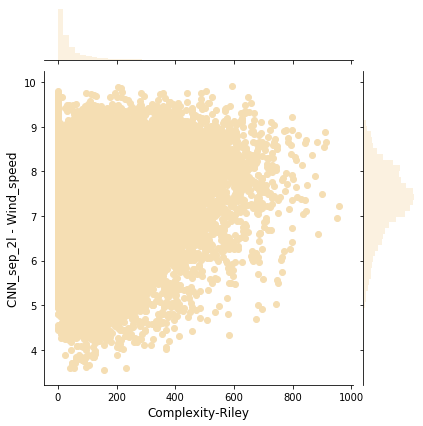

In [39]:
df = pd.read_csv('e:/Wind$JM/analysis_final_results_experiments/site-state/20191225SummaryFile(0.6)-arreglado.csv')
q = df["complexity_riley"].quantile(0.9999)
df = df[df["complexity_riley"] < q]
snsplot = sns.jointplot(x='complexity_riley', y='JM_CNN_sep_2l_FULL-test', data=df, color = "wheat")
snsplot.set_axis_labels('Complexity-Riley','CNN_sep_2l - Wind_speed', fontsize=12)
snsplot.savefig('Riley_complexity.png')

In [40]:
col1 = 'JM_CNN_sep_2l_FULL-test'
col2 = 'complexity_riley'
correlation = df[col2].corr(df[col1])
print(correlation)

0.0077532513528883185


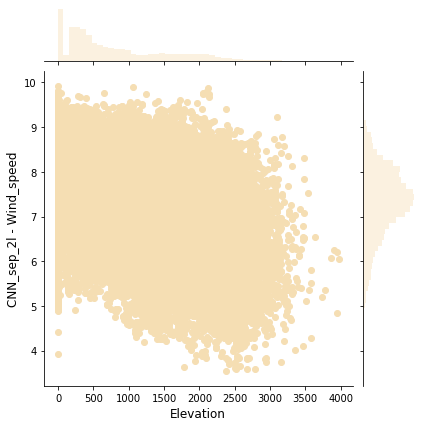

In [41]:
df = pd.read_csv('e:/Wind$JM/analysis_final_results_experiments/site-state/20191225SummaryFile(0.6)-arreglado.csv')
snsplot = sns.jointplot(x='elevation', y='JM_CNN_sep_2l_FULL-test', data=df, color = "wheat")
snsplot.set_axis_labels('Elevation', 'CNN_sep_2l - Wind_speed', fontsize=12)
snsplot.savefig('Elevation_complexity.png')